In [1]:
import numpy as np
import os
import sys

# Data Generation for a line

In [2]:
def data_points_on_a_line(slope,bias,i=250,starting_x=0):
    x = np.linspace(starting_x,starting_x + 25,i,endpoint=True)
    y = slope*x + bias
    return x,y

In [3]:
x_line,y_line = data_points_on_a_line(1,0,50)

In [4]:
input_y_line = y_line + np.random.uniform(-5,5,len(y_line))

In [5]:
import matplotlib.pyplot as plt

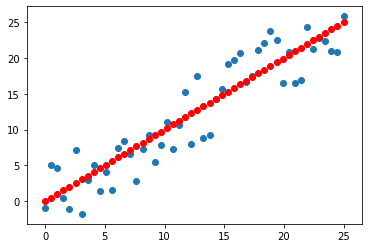

In [11]:
plt.scatter(x_line, input_y_line)
plt.scatter(x_line, y_line,c = "r")
plt.show()

# Data Generation for a Circle

In [21]:
def data_points_on_a_circle(r,n=5):
    cos_theta = np.cos(np.linspace(-np.pi,np.pi,n,endpoint = False))
    sin_theta = np.sin(np.linspace(-np.pi,np.pi,n,endpoint = False))
    return r*cos_theta, r*sin_theta

In [26]:
x_circle,y_circle=data_points_on_a_circle(50,50)

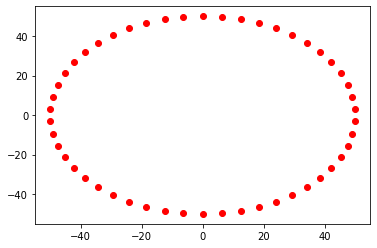

In [35]:
plt.scatter(y_circle,x_circle,c = "r")
plt.show()

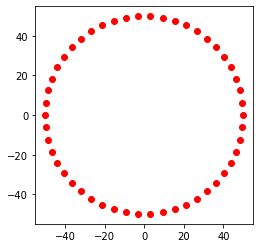

In [36]:
fig, ax = plt.subplots(1)
ax.scatter(x_circle, y_circle, c = "r")
ax.set_aspect(1)
plt.show()

# Linear Regression Code using NUMPY

In [37]:
def total_error(y_line, predicted_y):
    error = 2*np.average(np.square(y_line - predicted_y))
    return error

In [44]:
def step_gradient(x_line,y_line, slope, bias, learning_rate):
    y_pred = slope*x_line + bias
    error = total_error(y_line, y_pred)
    ds = np.average(np.multiply(y_pred - y_line,x_line))
    db = np.average(y_pred - y_line)
    slope = slope - learning_rate*ds
    bias = bias - learning_rate*db
    return slope, bias, error

In [45]:
def gradient_descent(num_iterations, x_line, y_line, initial_slope, initial_bias, learning_rate):
    slope = initial_slope
    bias = initial_bias
    for i in range(num_iterations):
        slope, bias, error = step_gradient(x_line,y_line,slope, bias, learning_rate)
        if (num_iterations/(i+1))%(i+1) == 0:
            print("error:- ",error,"slope: ",slope,"bias: ",bias)
    return slope, bias

In [54]:
initial_slope = np.array([0])
initial_bias = np.array([0])

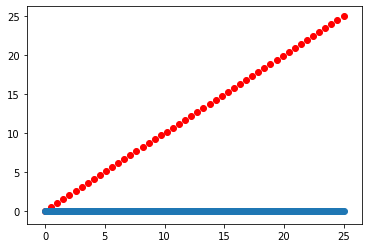

In [55]:
plt.scatter(x_line, y_line,c = "r")
plt.scatter(data_points_on_a_line(initial_slope,initial_bias)[0],data_points_on_a_line(initial_slope,initial_bias)[1])
plt.show()

[0.93436076] [0.05536504]
error:-  1.6379554156732357 slope:  [0.93567299] bias:  [0.05544155]


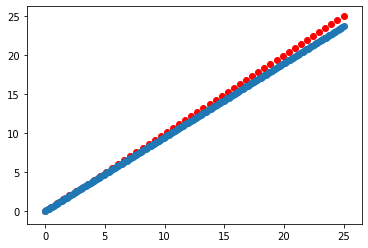

In [80]:
learning_rate = 0.0001
num_iterations = 10
print(initial_slope,initial_bias)
initial_slope, initial_bias = gradient_descent(num_iterations, x_line, y_line, initial_slope, initial_bias, learning_rate)


plt.scatter(x_line, y_line,c = "r")
plt.scatter(data_points_on_a_line(initial_slope,initial_bias)[0],data_points_on_a_line(initial_slope,initial_bias)[1])
# plt.scatter(x_line, y_line)
plt.show()

In [93]:
initial_slope = np.array([5.5084165854])
initial_bias = np.array([41.0])

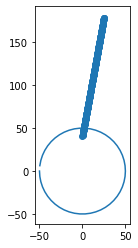

In [94]:
fig, ax = plt.subplots(1)
ax.plot(x_circle, y_circle)
ax.set_aspect(1)
plt.scatter(data_points_on_a_line(initial_slope,initial_bias)[0],data_points_on_a_line(initial_slope,initial_bias)[1])
# plt.scatter(x_line, y_line)
plt.show()

In [131]:
learning_rate = 0.001
num_iterations = 1002

initial_slope, initial_bias = gradient_descent(num_iterations, x_circle, y_circle, initial_slope, initial_bias, learning_rate)

error:-  2500.0 slope:  [1.85662833e-17] bias:  [8.50528737e-09]


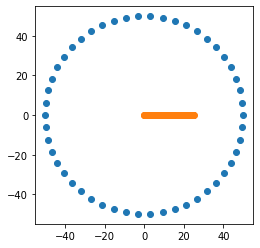

In [132]:
fig, ax = plt.subplots(1)
ax.scatter(x_circle, y_circle)
ax.set_aspect(1)
plt.scatter(data_points_on_a_line(initial_slope,initial_bias)[0],data_points_on_a_line(initial_slope,initial_bias)[1])
# plt.scatter(x_line, y_line)
plt.show()

# Creating classification data

In [47]:
input_y_classification = []
a= input_y_line.mean()
for i in input_y_line:
    if i <= a:
        input_y_classification.append(0)
    else:
        input_y_classification.append(1)

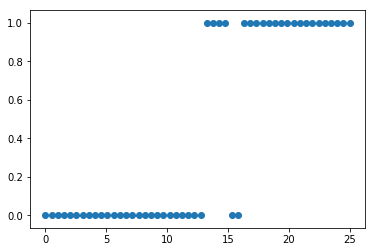

In [48]:
plt.scatter(x_line, input_y_classification)
plt.show()

# Classification model using linear regression.

In [49]:
initial_slope = np.array([0])
initial_bias = np.array([0])

In [50]:
learning_rate = 0.001
num_iterations = 100

initial_slope, initial_bias = gradient_descent(num_iterations, x_line, input_y_classification, initial_slope, initial_bias, learning_rate)

error:-  0.88 slope:  [0.00856122] bias:  [0.00044]
error:-  0.6170871036162042 slope:  [0.01531516] bias:  [0.00077254]
error:-  0.28835702462084256 slope:  [0.02816422] bias:  [0.00132948]
error:-  0.1936969764863905 slope:  [0.03677894] bias:  [0.00149685]


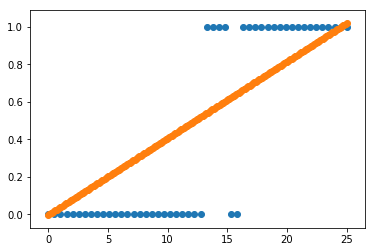

In [51]:
plt.scatter(x_line, input_y_classification)
plt.scatter(data_points_on_a_line(initial_slope,initial_bias)[0],data_points_on_a_line(initial_slope,initial_bias)[1])
plt.show()

In [52]:
x = (0.5 - initial_bias)/initial_slope

In [53]:
x = [x, x]
y = [1.5, -0.5]

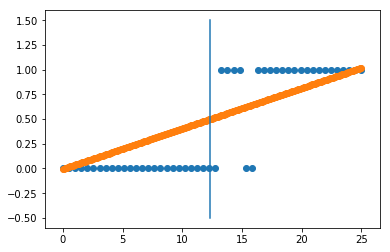

In [54]:
plt.scatter(x_line, input_y_classification)
plt.scatter(data_points_on_a_line(initial_slope,initial_bias)[0],data_points_on_a_line(initial_slope,initial_bias)[1])
plt.plot(x,y)
plt.show()